<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Feature-engineering" data-toc-modified-id="Feature-engineering-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Feature engineering</a></span></li><li><span><a href="#Outliers" data-toc-modified-id="Outliers-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Outliers</a></span><ul class="toc-item"><li><span><a href="#Generate-simulated-data" data-toc-modified-id="Generate-simulated-data-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Generate simulated data</a></span></li><li><span><a href="#Plot-the-data" data-toc-modified-id="Plot-the-data-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Plot the data</a></span></li><li><span><a href="#IsolationForest" data-toc-modified-id="IsolationForest-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>IsolationForest</a></span></li><li><span><a href="#Evaluate-results" data-toc-modified-id="Evaluate-results-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Evaluate results</a></span></li></ul></li><li><span><a href="#Missing-values" data-toc-modified-id="Missing-values-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Missing values</a></span><ul class="toc-item"><li><span><a href="#Check-missing-values" data-toc-modified-id="Check-missing-values-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Check missing values</a></span></li><li><span><a href="#SimpleImputer" data-toc-modified-id="SimpleImputer-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>SimpleImputer</a></span></li><li><span><a href="#KNNImputer" data-toc-modified-id="KNNImputer-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>KNNImputer</a></span></li><li><span><a href="#IterativeImputer" data-toc-modified-id="IterativeImputer-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>IterativeImputer</a></span></li></ul></li><li><span><a href="#Scaling" data-toc-modified-id="Scaling-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Scaling</a></span></li><li><span><a href="#Feature-selection" data-toc-modified-id="Feature-selection-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Feature selection</a></span></li><li><span><a href="#VarianceThreshold" data-toc-modified-id="VarianceThreshold-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>VarianceThreshold</a></span><ul class="toc-item"><li><span><a href="#SelectKBest" data-toc-modified-id="SelectKBest-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>SelectKBest</a></span></li><li><span><a href="#SelectFromModel" data-toc-modified-id="SelectFromModel-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>SelectFromModel</a></span></li><li><span><a href="#Feature-importance" data-toc-modified-id="Feature-importance-6.3"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>Feature importance</a></span></li></ul></li><li><span><a href="#Evaluation" data-toc-modified-id="Evaluation-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Evaluation</a></span></li></ul></div>

# Feature engineering

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Outliers

## Generate simulated data

In [4]:
rng = np.random.RandomState(42)

# Generating training data 
X_train = 0.2 * rng.randn(1000, 2)
X_train = np.r_[X_train + 3, X_train]
X_train = pd.DataFrame(X_train, columns = ['x1', 'x2'])

# Generating new, 'normal' observation
X_test = 0.2 * rng.randn(200, 2)
X_test = np.r_[X_test + 3, X_test]
X_test = pd.DataFrame(X_test, columns = ['x1', 'x2'])

# Generating outliers
X_outliers = rng.uniform(low=-1, high=5, size=(50, 2))
X_outliers = pd.DataFrame(X_outliers, columns = ['x1', 'x2'])

## Plot the data

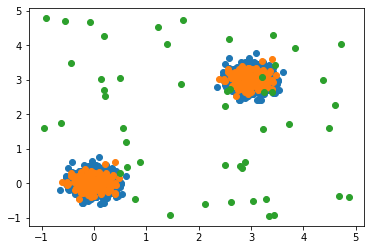

In [5]:
plt.scatter(X_train.x1, X_train.x2)
plt.scatter(X_test.x1, X_test.x2)
plt.scatter(X_outliers.x1, X_outliers.x2)

In [ ]:
## Look for outliers

## IsolationForest

In [6]:
# Isolation Forest ----
from sklearn.ensemble import IsolationForest


## Evaluate results

# Missing values

In [10]:
from sklearn import datasets
boston = datasets.load_boston()

In [11]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [17]:
boston_df = pd.read_csv('data/boston_missing.csv')
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,NaN,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,NaN,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,NaN,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Check missing values

## SimpleImputer

In [13]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import  SimpleImputer, KNNImputer, IterativeImputer, MissingIndicator

## KNNImputer

## IterativeImputer

# Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

# Feature selection

In [22]:
# function for creating a feature importance dataframe
def imp_df(column_names, importances):
    df = pd.DataFrame({'feature': column_names,
                       'feature_importance': importances}) \
           .sort_values('feature_importance', ascending = False) \
           .reset_index(drop = True)
    return df

# plotting a feature importance dataframe (horizontal barchart)
def var_imp_plot(imp_df, title):
    imp_df.columns = ['feature', 'feature_importance']
    sns.barplot(x = 'feature_importance', y = 'feature', data = imp_df, orient = 'h', color = 'royalblue') \
       .set_title(title, fontsize = 20)

# VarianceThreshold

In [20]:
from sklearn.feature_selection import VarianceThreshold

## SelectKBest

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression, RFE

## SelectFromModel

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV, RidgeCV

## Feature importance

In [24]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           oob_score = True,
                           bootstrap = True)

# Evaluation

In [19]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler